In [1]:
#importing the required deep learning frameworks
import keras

In [2]:
#importing the required packages for executing sub- processes.

import numpy as np #numpy is used for matrix operation and other mathematical operations.
import pandas as pd #Pandas is used for data visualisation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #getting the MNIST dataset.

In [3]:
#splitting of the obtained dataset.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


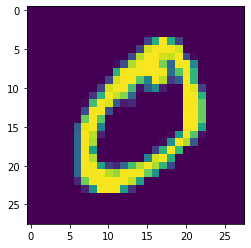

In [5]:
#the example data in the dataset is visualised here.
print (X_train.shape) #the X_train is the training containing 60,000 examples.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [6]:
#reshaping the obtained data is reshaped into a dimesion of 28X28 pixels image.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
#normalising the data into 0,1 rather than values from 0 to 255 as normalised values are easily processed.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10] #training data labels.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
#we are categorising the output values form 0 to 9 as there are 10 classes of products.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:

Y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
#this is the Main model which predicts after getting trained on the training data.
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(128, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(256, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(512, (3, 3), activation = 'relu'))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Convolution2D(1024, (3, 3), activation = 'relu'))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [14]:
#summarises the model parameters.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 256)       295168    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 512)       1180160   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 1024)        4719616   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 1024)        0

In [15]:
#the loss function and the optimising function such as ADAM,ADAMAX, RMSprop,etc are given.
#the metrics to measure the model's performance is by accuracy of its predictions.
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [29]:
#the model is getting trained with X_train and Y_train datasets with a batch size of 16 and 2 epochs which is iterating 2times over the train data.
model.fit(X_train,Y_train, batch_size=16, epochs=2)


Epoch 1/2
 169/3750 [>.............................] - ETA: 8:17:42 - loss: 1.1333 - accuracy: 0.6121

KeyboardInterrupt: 

In [ ]:
#evaluating the model performance using the validation set.
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
print(score)

In [ ]:
#predicting the lables or values for test data and evaluating the accuracy.
y_pred = model.predict(X_test)
acc= model.evaluate(y_pred,y_test )
print(acc)

In [ ]:
#prdicted labels for te fist 10 products.
print(y_pred[:9])
print(y_test[:9])